# IIC-3641 GML UC

In [1]:
import networkx as nx

fh = open("107.edges", "rb")
G = nx.read_edgelist(fh)
fh.close()

print(G)

Graph with 1034 nodes and 26749 edges



## Actividad en clase

Haga lo siguiente:

- Visualice la red usando coloración por grado.
- Visualice la distribución de grado en escala log-log.
- Ajuste una power-law y calcule el coeficiente γ. ¿Qué puede concluir?
- Calcule el coeficiente de determinación ¿Qué puede concluir?
- Ahora calcule el p-value ¿Es sorprendente el resultado? Explíquelo. 
- Dígame si la red es scale-free o no.
- Cuanto termine, me avisa para entregarle una **L (logrado)**.
- Recuerde que las L otorgan un bono en la nota final de la asignatura.

***Tiene hasta el final de la clase.***

# Visualizamos la red usando coloración por grado

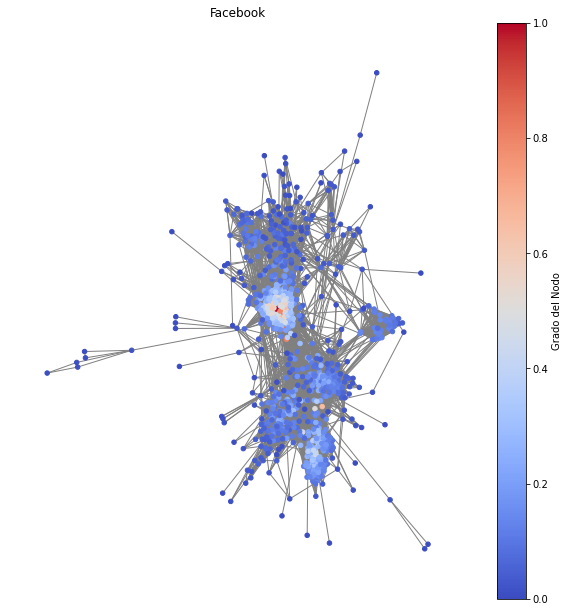

In [2]:
import matplotlib.pyplot as plt
import numpy as np

node_degrees = dict(G.degree())
degrees = np.array(list(node_degrees.values()))
min_degree = degrees.min()
max_degree = degrees.max()

normalized_degrees = (degrees - min_degree) / (max_degree - min_degree)

colors = plt.cm.coolwarm(normalized_degrees)


pos = nx.spring_layout(G)  # Posiciones de los nodos

plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_color=colors, with_labels=False, node_size=20, cmap=plt.cm.coolwarm, edge_color='gray')
plt.title("Facebook")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label="Grado del Nodo")
plt.show()

# Visualice la distribución de grados en escala log-log

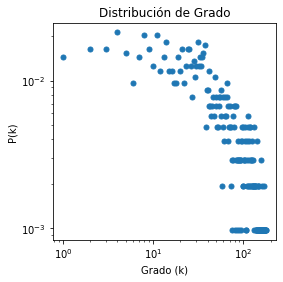

In [3]:
degree_counts = {}
for degree in degrees:
    if degree in degree_counts:
        degree_counts[degree] += 1
    else:
        degree_counts[degree] = 1

sorted_degrees = sorted(degree_counts.items())

x, y = zip(*sorted_degrees)
p = [n / 1034 for n in y]

plt.figure(figsize=(4, 4))
plt.loglog(range(1, len(x) + 1), p, 'o', markersize=5)
plt.xlabel('Grado (k)')
plt.ylabel('P(k)')
plt.title('Distribución de Grado')
plt.show()

# Ajuste una power-law a la distribución de grado

In [4]:
from scipy import stats

log_k = np.log(range(1, len(x) + 1))
log_pk = np.log(p)

slope, intercept, r_value, p_value, std_err = stats.linregress(log_k, log_pk)

gamma = -slope
print(f'El exponente de la ley de potencias (γ) es aproximadamente: {gamma:.4f}')

El exponente de la ley de potencias (γ) es aproximadamente: 0.8331


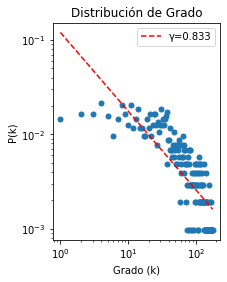

In [5]:
# Graficar la distribución de grado en una escala log-log
plt.figure(figsize=(3, 4))
plt.loglog(range(1, len(x) + 1), p, 'o', markersize=5)
plt.xlabel('Grado (k)')
plt.ylabel('P(k)')
plt.title('Distribución de Grado')

# Graficar la línea ajustada
plt.plot(np.exp(log_k), np.exp(intercept + slope * log_k), color='red', linestyle='--', label='γ=0.833')
plt.legend()
plt.show()

# Calculamos el coeficiente de determinación

In [6]:
# Coeficiente de determinación (R²), si es cercano a 1 tenemos un buen ajuste
r_squared = r_value**2
print(f"R²: {r_squared}")

R²: 0.656135495638735


## Podemos calcular el p-value

In [7]:
# p-value bajo (p-value < 0.05) sugiere una relación estadísticamente significativa
print(f"P-value: {p_value}")

P-value: 2.0133540504390058e-42
